In [2]:
import yfinance as yf

sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period = "max")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,0.0,0.0
2024-09-10 00:00:00-04:00,5490.509766,5497.910156,5441.720215,5495.520020,3848180000,0.0,0.0
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,0.0,0.0


In [4]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-08-30 00:00:00-04:00', '2024-09-03 00:00:00-04:00',
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',
               '2024-09-06 00:00:00-04:00', '2024-09-09 00:00:00-04:00',
               '2024-09-10 00:00:00-04:00', '2024-09-11 00:00:00-04:00',
               '2024-09-12 00:00:00-04:00', '2024-09-13 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24292, freq=None)

In [5]:
sp500.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
sp500.shape

(24292, 7)

In [7]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

<Axes: xlabel='Date', ylabel='Close'>

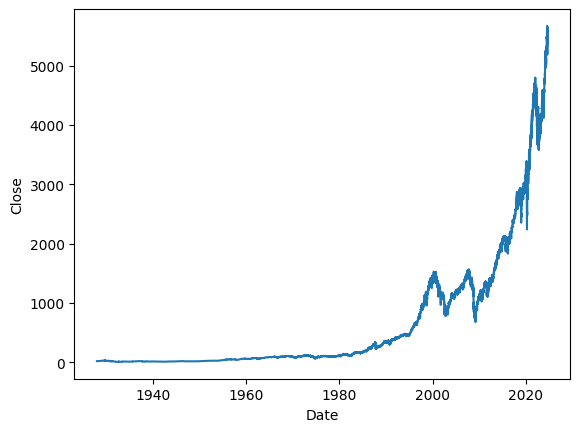

In [8]:
# Visuallizing the data

sns.lineplot(y = "Close", x = "Date", data = sp500)

In [9]:
# Cleaning the data

sp500.drop('Dividends', axis = 1, inplace = True)
sp500.drop('Stock Splits', axis = 1, inplace = True)

In [10]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [11]:
# For Prediction We shifting the tomorrow column with next day close price

sp500["Tomorrow"] = sp500['Close'].shift(-1)
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [12]:
# Setting up target
# weather tomorrows price greater than todays price

sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,5495.520020,1
2024-09-10 00:00:00-04:00,5490.509766,5497.910156,5441.720215,5495.520020,3848180000,5554.129883,1
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,5595.759766,1
2024-09-12 00:00:00-04:00,5557.479980,5600.709961,5535.500000,5595.759766,3655070000,5626.020020,1
2024-09-13 00:00:00-04:00,5603.339844,5636.270020,5601.649902,5626.020020,3500790000,NaN,0


In [13]:
# Removing un usefule data before 2010

sp500 = sp500.loc["2010-01-01" :].copy()
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,1136.520020,1
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,1137.140015,1
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,1141.689941,1
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,1144.979980,1
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,1146.979980,1


In [14]:
sp500['EMA_10'] = sp500['Close'].ewm(span=10, adjust=False).mean()
sp500.head()
sp500.tail()

sp500.drop('Tomorrow', axis= 1, inplace=True)

In [15]:
sp500["Close"].count()

np.int64(3699)

In [16]:
# Moving average 10

EMA = sp500["Close"].rolling(10).mean()

<Axes: xlabel='Date', ylabel='Close'>

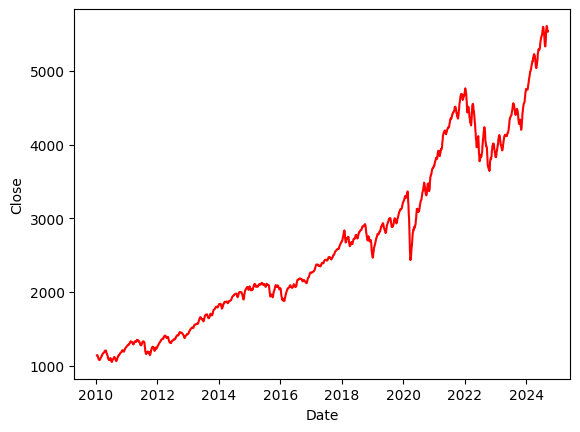

In [17]:
sns.lineplot(x = ('Date'), y = EMA, data = sp500, color = "Red")

<Axes: xlabel='Date', ylabel='EMA_10'>

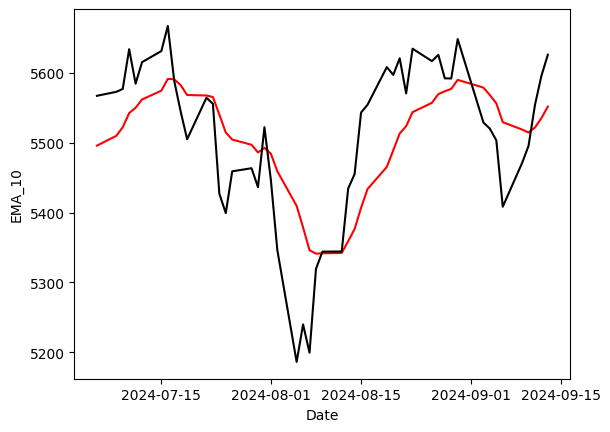

In [18]:
# 10 Ema With Price

sns.lineplot(x = ('Date'), y = 'EMA_10', data = sp500.tail(50), color = "Red")
sns.lineplot(x = ('Date'), y = 'Close', data = sp500.tail(50), color = "Black")

In [19]:
sp500.drop('Target',axis = 1, inplace=True)
sp500.tail(10)

,Open,High,Low,Close,Volume,EMA_10
Date,,,,,,
2024-08-30 00:00:00-04:00,5612.740234,5651.370117,5581.790039,5648.399902,4185850000,5590.007078
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5578.902186
2024-09-04 00:00:00-04:00,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,5568.205393
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,5556.424441
2024-09-06 00:00:00-04:00,5507.330078,5522.470215,5402.620117,5408.419922,3822800000,5529.514528
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,5518.884579
2024-09-10 00:00:00-04:00,5490.509766,5497.910156,5441.720215,5495.520020,3848180000,5514.636477
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,5521.817096
2024-09-12 00:00:00-04:00,5557.479980,5600.709961,5535.500000,5595.759766,3655070000,5535.261218


In [20]:
# Adding Columns

sp500['Buy'] = sp500["Open"] > sp500["EMA_10"]
sp500['Sell'] = sp500["Open"] < sp500["EMA_10"]

sp500.head()

,Open,High,Low,Close,Volume,EMA_10,Buy,Sell
Date,,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,1132.989990,False,True
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,1133.631814,False,True
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,1134.269668,True,False
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,1135.618809,True,False
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,1137.320840,True,False


# Traning an Initial Machine Learning Model

In [21]:
# Encoding the Result for open price
'''If open price below 10 ema then sell and vice versa'''

sp500['Buy_Signal'] = sp500['Buy'].astype(int)
sp500['Sell_Signal'] = sp500['Sell'].astype(int)

sp500.head()

,Open,High,Low,Close,Volume,EMA_10,Buy,Sell,Buy_Signal,Sell_Signal
Date,,,,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,1132.989990,False,True,0,1
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,1133.631814,False,True,0,1
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,1134.269668,True,False,1,0
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,1135.618809,True,False,1,0
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,1137.320840,True,False,1,0


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sp500['Buy_Sell_Encoded'] = le.fit_transform(sp500['Buy'])

sp500.head()

,Open,High,Low,Close,Volume,EMA_10,Buy,Sell,Buy_Signal,Sell_Signal,Buy_Sell_Encoded
Date,,,,,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,1132.989990,False,True,0,1,0
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,1133.631814,False,True,0,1,0
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,1134.269668,True,False,1,0,1
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,1135.618809,True,False,1,0,1
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,1137.320840,True,False,1,0,1


In [23]:
# Adding Result Column

'''if signal is buy and close price is less than open price and vice versa'''

sp500['Result'] = 'Irrelevant'

# Apply the condition to filter rows where "Buy" is True
mask = (sp500['Buy'] == True) & (sp500['Close'] < sp500['Open'])
sp500.loc[mask, 'Result'] = 'Incorrect'

mask = (sp500['Buy'] == True) & (sp500['Close'] > sp500['Open'])
sp500.loc[mask, 'Result'] = 'Correct'

sp500.head()

,Open,High,Low,Close,Volume,EMA_10,Buy,Sell,Buy_Signal,Sell_Signal,Buy_Sell_Encoded,Result
Date,,,,,,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,1132.989990,False,True,0,1,0,Irrelevant
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,1133.631814,False,True,0,1,0,Irrelevant
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,1134.269668,True,False,1,0,1,Correct
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,1135.618809,True,False,1,0,1,Correct
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,1137.320840,True,False,1,0,1,Correct


In [34]:
# Counting the result

print(sp500["Result"].value_counts()['Correct'])
print(sp500["Result"].value_counts()['Irrelevant'])

print(sp500["Result"].count())

1265
1275
3699


In [28]:
sp500.describe()

,Open,High,Low,Close,Volume,EMA_10,Buy_Signal,Sell_Signal,Buy_Sell_Encoded
count,3699.000000,3699.000000,3699.000000,3699.000000,3.699000e+03,3699.000000,3699.000000,3699.000000,3699.000000
mean,2663.857446,2678.185251,2648.560273,2664.432752,3.938810e+09,2659.057116,0.655583,0.344417,0.655583
std,1194.480967,1200.923192,1187.792863,1194.634624,9.495007e+08,1190.673021,0.475242,0.475242,0.475242
min,1027.650024,1032.949951,1010.909973,1022.580017,1.025000e+09,1050.690753,0.000000,0.000000,0.000000
25%,1689.315002,1693.529968,1682.494995,1690.705017,3.370670e+09,1684.537075,0.000000,0.000000,0.000000
50%,2389.699951,2394.750000,2380.129883,2388.610107,3.782390e+09,2384.680041,1.000000,0.000000,1.000000
75%,3694.380005,3714.029907,3661.625000,3694.770020,4.302215e+09,3695.215584,1.000000,1.000000,1.000000
max,5644.089844,5669.669922,5639.020020,5667.200195,1.061781e+10,5591.382947,1.000000,1.000000,1.000000
